In [1]:
import pandas as pd
import numpy as np
import pyarrow.dataset as pads
import pyarrow.csv as pacsv
from SMT_Data_Starter_2025 import readDataSubset
import matplotlib.pyplot as plt
from Animation import plot_animation

In [2]:
# Just get the subsets out of the way
game_info_subset = readDataSubset('game_info')
game_events_subset = readDataSubset('game_events')
player_position_subset = readDataSubset('player_pos')
ball_position_subset = readDataSubset('ball_pos')

In [3]:
player_position_df = player_position_subset.to_table().to_pandas()
ball_position_df = ball_position_subset.to_table().to_pandas()

C:\Users\mla21\AppData\Local\Temp\ipykernel_10512\218468524.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ball = ball_position_df[(ball_position_df['game_str'] == game_str) & (ball_position_df['timestamp'] > 559500) & (player_position_df['timestamp'] > 565000)]
MovieWriter imagemagick unavailable; using Pillow instead.


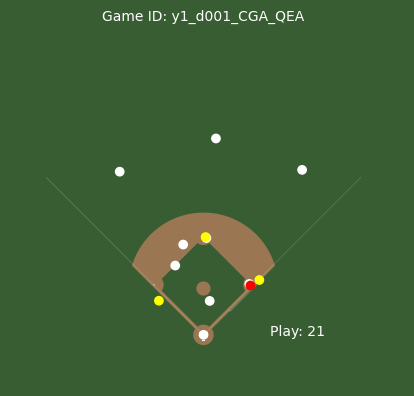

In [4]:
"""
Quick Visualization
"""
game_str = "y1_d001_CGA_QEA"
play_id = 21
# player = player_position_df[(player_position_df['game_str'] == game_str)]
# ball = ball_position_df[(ball_position_df['game_str'] == game_str)]
player = player_position_df[(player_position_df['game_str'] == game_str) & (player_position_df['timestamp'] > 559500) & (player_position_df['timestamp'] < 565000)]
ball = ball_position_df[(ball_position_df['game_str'] == game_str) & (ball_position_df['timestamp'] > 559500) & (player_position_df['timestamp'] > 565000)]
plot_animation(player, ball, play_id, save_gif=True)